In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data = data.drop(['Address'], axis=1)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


<Axes: >

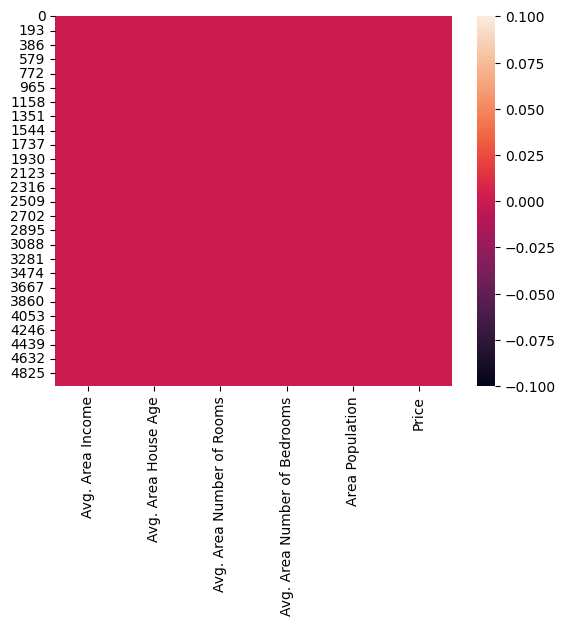

In [4]:
sns.heatmap(data.isnull())

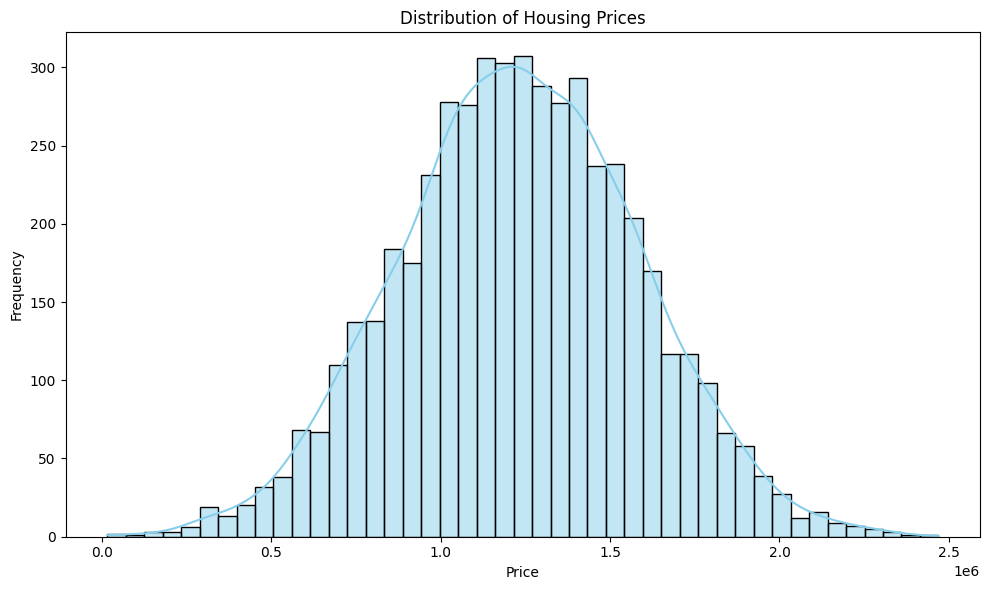

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], kde=True, color='skyblue')
plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


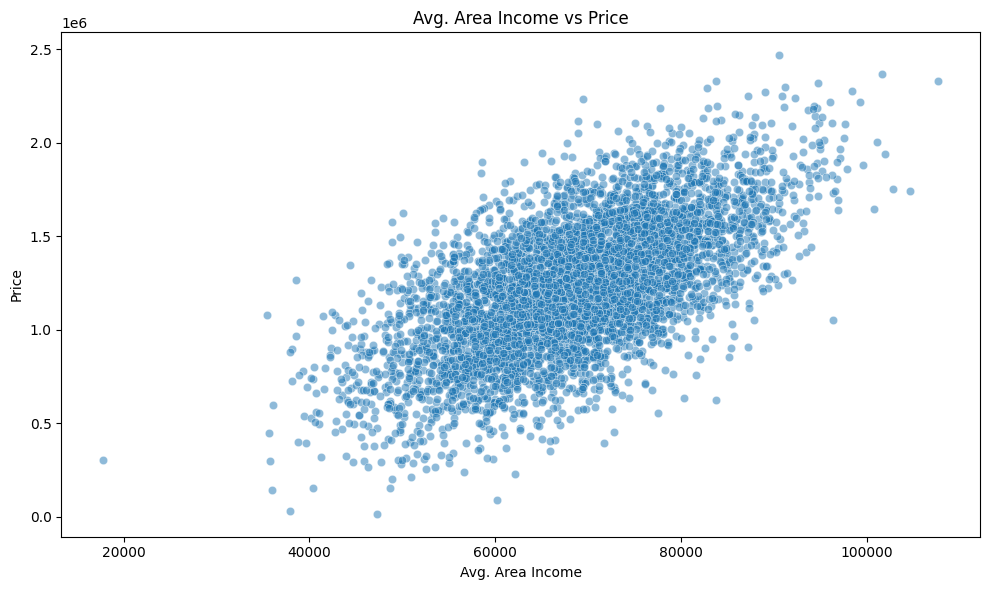

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['Avg. Area Income'], y=data['Price'], alpha=0.5)
plt.title('Avg. Area Income vs Price')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [11]:
X = data.drop('Price', axis=1)
Y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30)

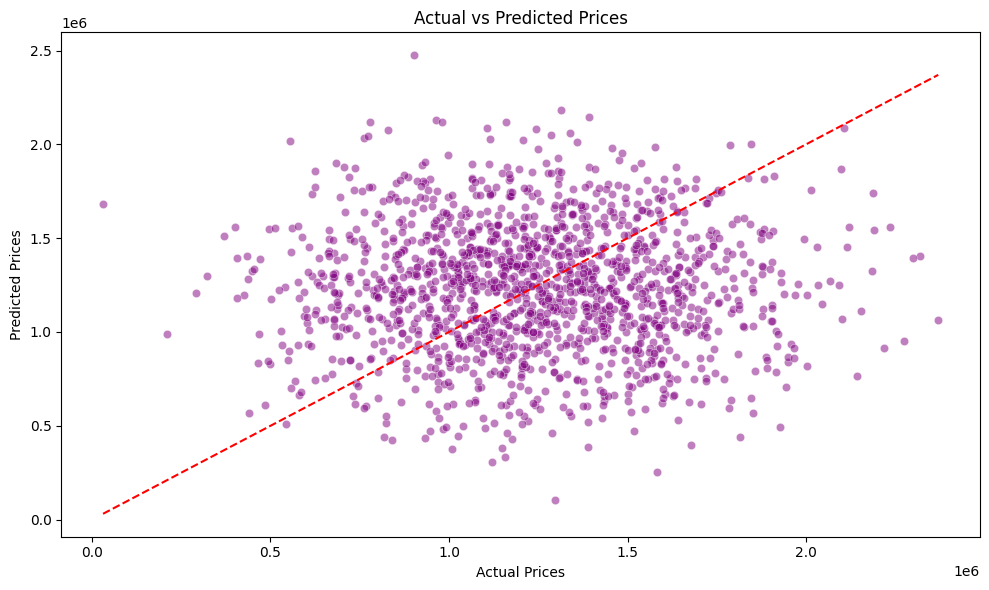

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_test, y=predictions, alpha=0.5, color='purple')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
plt.tight_layout()
plt.show()


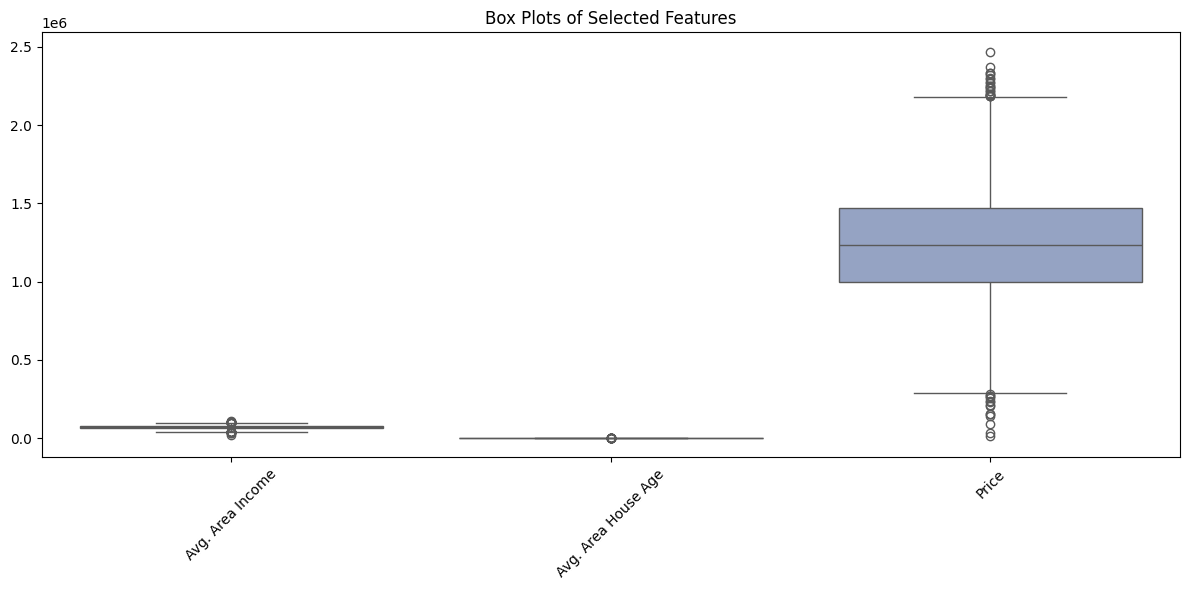

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['Avg. Area Income', 'Avg. Area House Age', 'Price']], palette='Set2')
plt.title('Box Plots of Selected Features')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()



In [17]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
predictions = model.predict(X_test)

In [8]:
predictions

array([1017827.9115294 , 1169973.02818706, 1417462.00021364, ...,
       1316454.16056595, 1423236.94359515, 1230205.63670997],
      shape=(1500,))

In [9]:
error = np.sqrt(metrics.mean_absolute_error(Y_test, predictions))

In [10]:
error

np.float64(287.809606956927)

In [25]:
predictions1 = model.predict(X_test)

mae = mean_absolute_error(Y_test, predictions1)
rmse = np.sqrt(mean_squared_error(Y_test, predictions1))
r2 = r2_score(Y_test, predictions1)





In [24]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 81453.08
Root Mean Squared Error (RMSE): 101613.06
R² Score: 0.92
